In [7]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [8]:
num_inputs = 784
num_hidden = 1000
num_outputs = 10
beta = 0.99

fc1 = nn.Linear(num_inputs,num_hidden)
lif1 = snn.Leaky(beta=beta)
fc2 = nn.Linear(num_hidden,num_outputs)
lif2 = snn.Leaky(beta=beta)

mem1 = lif1.init_leaky()
mem2 = lif2.init_leaky()

mem2_rec = []
spk1_rec = []
spk2_rec = []

spk_in = spikegen.rate_conv(torch.rand((200, 784))).unsqueeze(1)

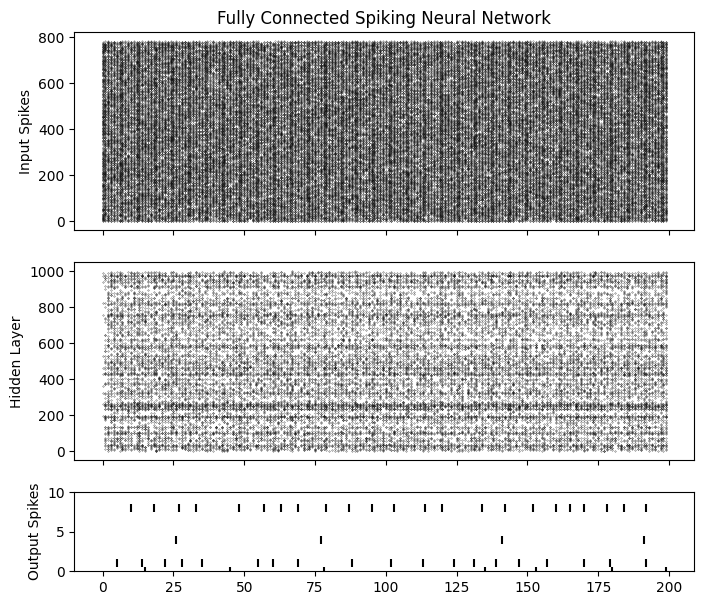

In [9]:
num_steps = 200
for step in range(num_steps):
    cur1 = fc1(spk_in[step])
    spk1, mem1 = lif1(cur1,mem1)
    cur2 = fc2(spk1)
    spk2,mem2 = lif2(cur2,mem2)

    mem2_rec.append(mem2)
    spk1_rec.append(spk1)
    spk2_rec.append(spk2)

mem2_rec = torch.stack(mem2_rec)
spk1_rec = torch.stack(spk1_rec)
spk2_rec = torch.stack(spk2_rec)

def plot_snn_spikes(spk_in, spk1_rec, spk2_rec, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,7), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input spikes
  splt.raster(spk_in[:,0], ax[0], s=0.03, c="black")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)

  # Plot hidden layer spikes
  splt.raster(spk1_rec.reshape(num_steps, -1), ax[1], s = 0.05, c="black")
  ax[1].set_ylabel("Hidden Layer")

  # Plot output spikes
  splt.raster(spk2_rec.reshape(num_steps, -1), ax[2], c="black", marker="|")
  ax[2].set_ylabel("Output Spikes")
  ax[2].set_ylim([0, 10])

  plt.show()

plot_snn_spikes(spk_in, spk1_rec, spk2_rec, "Fully Connected Spiking Neural Network")
